<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/Himmelblau_function%26GGD_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import torch.optim as optim

# himmeblau function

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c58cd364f39ccc8ae66ed6c693954bb44c829c62)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/405a45009d967e8f322db1774aaf3b5dbfd42208)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/caded970ee92937517b927762425ef4aebfbdb48)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/35e2dc4ec819bda4d01c51348b6ce1cb45113c13)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/de087b1c4c626f38f446a826aefa8596c1751470)

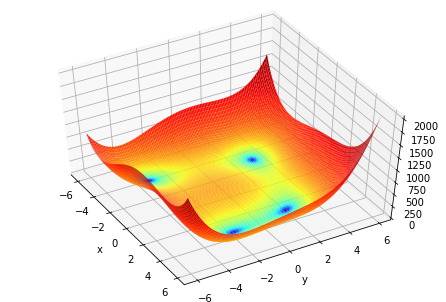

In [2]:
def himmeblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(x, y)
Z = himmeblau([X, Y])

fig = plt.figure('himmelblau')
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z,rstride = 1, cstride = 1,cmap=cm.jet,norm = LogNorm())
ax.view_init(50, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# basinhopping

In [3]:
from scipy.optimize import basinhopping

num_var = 2 
lb, ub = -6, 6
x0 = np.array([np.random.uniform(lb,ub) for _ in range(num_var)])
res = basinhopping(himmeblau,x0)
print(res.x),
print(round(res.fun,10))

[3. 2.]
0.0


# GGD

In [4]:
import torch
from torch.nn import Linear,Sigmoid,init,Tanh

def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,128),
      Linear(128,output_shape),
      Tanh()#限縮到區間[-1,1]
      )
  return net

def init_weights(m):
  if type(m) == Linear:
    init.xavier_uniform(m.weight)#初始化weight
    m.bias.data.fill_(0)#初始化bias

# generator net
net = build_net(10,2)
net.apply(init_weights)

# random noise
noise = torch.tensor(np.random.normal(size=(5000,10)), dtype=torch.float)
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=128)

# obj_function
def obj_function(x):
  Total, n = 0, len(x)
  for idx in range(n):
    Total += himmeblau(x[idx,:])
  return Total/n

# optimizer
optimizer = optim.Adam(net.parameters(),lr=0.0001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  


In [0]:
def GGD(net,noise_iter,obj_function,optimizer,num_epochs=50):
  history = []
  for epoch in range(num_epochs):
    for noise in noise_iter:
      obj_input = net(noise[0]) # forward generator
      obj_input = obj_input*torch.Tensor([6]) #轉換區間到[-6,6]
      loss = obj_function(obj_input) # caculate loss
      loss.mean().backward()
      optimizer.step()
      optimizer.zero_grad()
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # plt train loss
  plt.plot(np.array(history))
  plt.title('train loss')
  # answer
  answer = net(noise[0]).detach().numpy().mean(axis=0)*6
  return net,answer

epochs 0 loss 107.7861
epochs 1 loss 92.4623
epochs 2 loss 77.1438
epochs 3 loss 61.6333
epochs 4 loss 51.1420
epochs 5 loss 45.4390
epochs 6 loss 40.8966
epochs 7 loss 37.1208
epochs 8 loss 34.8229
epochs 9 loss 31.8240
epochs 10 loss 18.3899
epochs 11 loss 1.6393
epochs 12 loss 0.1315
epochs 13 loss 0.0136
epochs 14 loss 0.0013
epochs 15 loss 0.0001
epochs 16 loss 0.0000
epochs 17 loss 0.0000
epochs 18 loss 0.0000
epochs 19 loss 0.0000
epochs 20 loss 0.0000
epochs 21 loss 0.0000
epochs 22 loss 0.0000
epochs 23 loss 0.0000
epochs 24 loss 0.0000
epochs 25 loss 0.0000
epochs 26 loss 0.0000
epochs 27 loss 0.0000
epochs 28 loss 0.0000
epochs 29 loss 0.0000


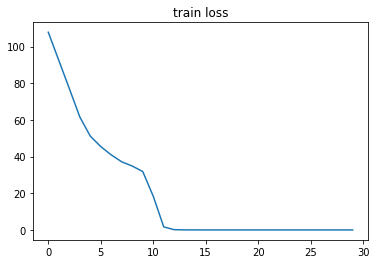

In [6]:
G,answer = GGD(net,noise_iter,obj_function,optimizer,num_epochs=30)

In [7]:
print(answer)

[3.0000005 2.0000005]
